<a href="https://colab.research.google.com/github/ag22042008/fake-news-streamlit/blob/main/project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import re
import nltk

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
import joblib

In [ ]:
df=pd.read_csv("/content/WELFake_Dataset.csv")

In [ ]:
df.head()

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [ ]:
df['label'].value_counts()

,count
label,
1,37106
0,35028


In [ ]:
df['text']=df['title'].fillna('')+''+df['text'].fillna('')

In [ ]:
df=df[['text','label']]

In [ ]:
df

,text,label
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,1
1,Did they post their votes for Hillary already?,1
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,1
3,"Bobby Jindal, raised Hindu, uses story of Chri...",0
4,SATAN 2: Russia unvelis an image of its terrif...,1
...,...,...
72129,Russians steal research on Trump in hack of U....,0
72130,WATCH: Giuliani Demands That Democrats Apolog...,1
72131,Migrants Refuse To Leave Train At Refugee Camp...,0
72132,Trump tussle gives unpopular Mexican leader mu...,0


In [ ]:
df.isnull().sum()


,0
text,0
label,0


In [ ]:
#cleaning the text
Stopwords=set(stopwords.words('english'))
negations={"no","nor","not"}
Stopwords=Stopwords-negations

In [ ]:
def clean_text(text):
  text=str(text).lower()
  text=re.sub(r'http\S+|www\S+','',text)
  text=re.sub(r'<.*?>','',text)
  text=re.sub(r'<.*?>','',text)
  text=re.sub(r'[^a-z0-9\s]','',text)
  words=[w for w in text.split() if w not in Stopwords]
  return" ".join(words)



In [ ]:
df['clean_text']=df['text'].apply(clean_text)

In [ ]:
x=df['clean_text']
y=df['label']
x_TRAIN,X_TEST,Y_TRAIN,Y_TEST=train_test_split(x,y,stratify=y,test_size=0.2,random_state=42)


In [ ]:
type(X_TEST)

pandas.core.series.Series

In [ ]:
tfidf=TfidfVectorizer(max_features=20000,ngram_range=(1,2))
X_Train=tfidf.fit_transform(x_TRAIN)
X_Test=tfidf.transform(X_TEST)

In [ ]:
model=LogisticRegression(max_iter=1000,class_weight='balanced')
model.fit(X_Train,Y_TRAIN)



LogisticRegression(class_weight='balanced', max_iter=1000)

In [ ]:
y_predict=model.predict(X_Test)

In [ ]:
print("Accuracy:",round(accuracy_score(Y_TEST,y_predict),4))

Accuracy: 0.955


In [ ]:
y_predict

array([1, 1, 0, ..., 1, 1, 0])

In [ ]:
print("\nClassification Report\n",classification_report(Y_TEST,y_predict))


Classification Report
               precision    recall  f1-score   support

           0       0.96      0.95      0.95      7006
           1       0.95      0.96      0.96      7421

    accuracy                           0.96     14427
   macro avg       0.96      0.95      0.95     14427
weighted avg       0.96      0.96      0.96     14427



In [ ]:
cm=confusion_matrix(Y_TEST,y_predict)

In [ ]:
print(cm)

[[6651  355]
 [ 294 7127]]


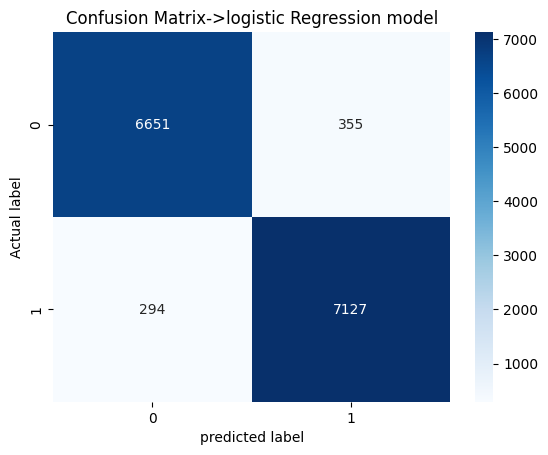

In [ ]:
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.xlabel('predicted label')
plt.ylabel('Actual label')
plt.title('Confusion Matrix->logistic Regression model')
plt.show()

In [ ]:
title=input("enter the title of the news :")
text=input("enter the text of the news :")
full_text=title+" "+text
text_clean=clean_text(full_text)
text_tf=tfidf.transform([text_clean])
prediction=model.predict(text_tf)
if(prediction==1):
  print("fake News")
else:
  print("REAL NEWS")
prob=model.predict_proba(text_tf)
print("prediction",prediction)
print("confidence(Real or fake):",prob)

enter the title of the news :Bobby Jindal, raised Hindu, uses story of Christian conversion to woo evangelicals for potential 2016 bid
enter the text of the news :A dozen politically active pastors came here for a private dinner Friday night to hear a conversion story unique in the context of presidential politics: how Louisiana Gov. Bobby Jindal traveled from Hinduism to Protestant Christianity and, ultimately, became what he calls an â€œevangelical Catholic.â€  Over two hours, Jindal, 42, recalled talking with a girl in high school who wanted to â€œsave my soul,â€ reading the Bible in a closet so his parents would not see him and feeling a stir while watching a movie during his senior year that depicted Jesus on the cross.  â€œI was struck, and struck hard,â€ Jindal told the pastors. â€œThis was the Son of God, and He had died for our sins.â€  Jindalâ€™s session with the Christian clergy, who lead congregations in the early presidential battleground states of Iowa and South Carol

In [ ]:
import joblib
joblib.dump(model,'model.joblib')
joblib.dump(tfidf,'tfidf.joblib')
print("model and vectorizer are saved sucessfully")

model and vectorizer are saved sucessfully
